# 4.10. Final task

## Table of contents:

### 1. Importing data
### 2. Addressing PII data 
### 3. Creating a region groups
### 4. Exclusion of low-activity customers
### 5. + 6. Customer profiling and visulaizations
#### a) Age groups
#### b) Incone categpry
#### c) Family type
#### d) Multidimensional customer profile
#### e) Department preferencies
#### f) Day and hour
### 7. Customer profile aggregations


## Importing libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 01. Importing data 

In [2]:
# Create folder path

path = r'/Users/edytakowal/Desktop/CareerFoundry/2. Data Immersion/4. Python Fundamentals/ Instacart Basket Analysis'

In [3]:
# Import the final_df.pkl dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_products_all.pkl'))

## 02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

I did this in the previous task; I removed the columns containing name and surname because they are not relevant in our analysis.

## 03. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [4]:
# Print first 5 rows of df

df.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,order_hour,days_since_prior_order,add_to_cart_order,reordered,max_order,loyalty_flag,avg_product_price,spending_flag,median_order_freq,freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,9,30.0,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,15,11.0,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,15,10.0,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,9,NaN,1,0,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,11,30.0,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
# Create region variables

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [6]:
# Create a new column with regions

df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'

In [7]:
# Check the output

df.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,days_since_prior_order,add_to_cart_order,reordered,max_order,loyalty_flag,avg_product_price,spending_flag,median_order_freq,freq_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,30.0,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,11.0,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,10.0,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,NaN,1,0,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,30.0,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [8]:
# Check the number of customers for each region

reg = df.groupby('region').user_id.nunique()

In [9]:
# Check the output 

reg

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Customers by region')

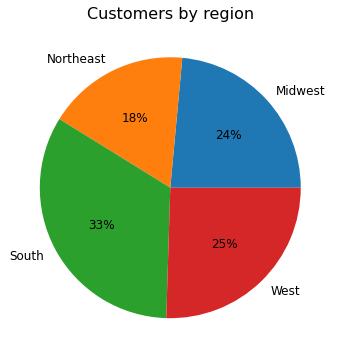

In [10]:
# Create a chart

reg_pie = reg.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6))

plt.title('Customers by region', fontsize = 16)

In [11]:
# Export chart outside of Jupyter in the form of an image file

reg_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_pie.png'))

In [12]:
# Check the number of orders for each region

reg_ord = df.groupby('region').order_id.nunique()

In [13]:
# Check the ooutput 

reg_ord

region
Midwest       754275
Northeast     567162
South        1071562
West          821686
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Orders by region')

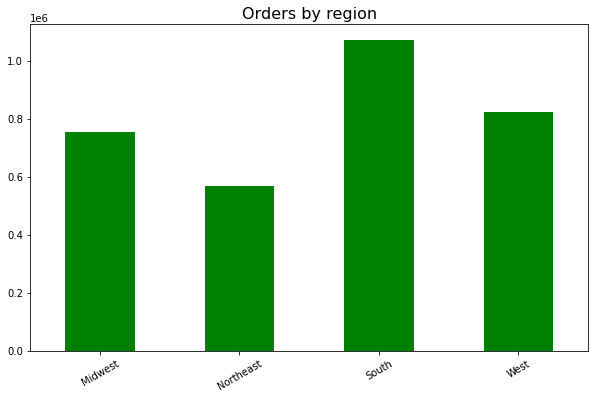

In [14]:
# Create a chart

reg_ord_bar = reg_ord.plot.bar(xlabel = (''), color = 'g', figsize = (10,6), rot = 30)
plt.title('Orders by region', fontsize = 16)

In [15]:
# Export chart outside of Jupyter in the form of an image file

reg_ord_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_ord_bar.png'))

In [16]:
# Craete a pivot table

gen_reg = pd.crosstab(index=df['region'], 
                          columns=df['gender'], 
                          values=df['user_id'], 
                          aggfunc='nunique')

In [17]:
# Check the output 

gen_reg

gender,Female,Male
region,,
Midwest,24182,24337
Northeast,17766,18622
South,34047,34690
West,26147,26418


Text(0.5, 1.0, 'Gender distribution by region')

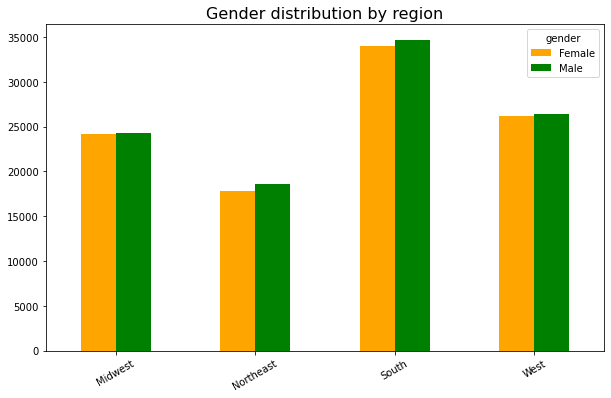

In [18]:
# Create a chart

colors = ['orange', 'green']

gen_reg_bar = gen_reg.plot.bar(xlabel = (''), color = colors, figsize = (10,6), rot = 30)

plt.title('Gender distribution by region', fontsize=16)

In [19]:
# Export chart outside of Jupyter in the form of an image file

gen_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gen_reg_bar.png'))

In [20]:
# Create a pivot table

spe_reg = pd.crosstab(index=df['region'], 
                          columns=df['spending_flag'], 
                          values=df['user_id'], 
                          aggfunc='nunique')

In [21]:
# Check the output

spe_reg

spending_flag,High spender,Low spender
region,,
Midwest,1263,47256
Northeast,881,35507
South,1815,66922
West,1392,51173


Text(0.5, 1.0, 'Low and high spenders by region')

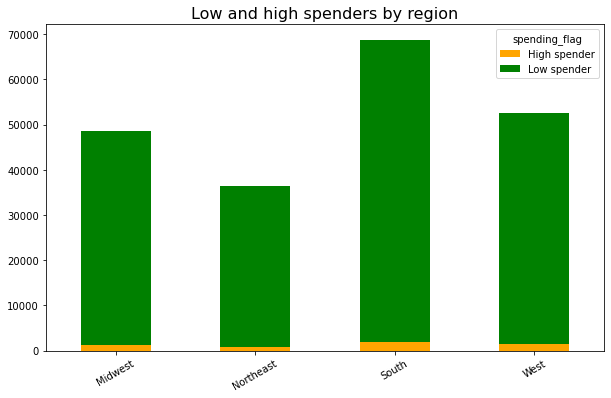

In [22]:
# Create a chart

colors = ['orange', 'green']

spe_reg_bar = spe_reg.plot.bar(stacked = True, xlabel = (''), color = colors, figsize = (10,6), rot = 30)

plt.title('Low and high spenders by region', fontsize=16)

In [23]:
# Export chart outside of Jupyter in the form of an image file

spe_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spe_reg_bar.png'))

In [24]:
# Number of orders taken by high and low spenders by region 

freq_reg = pd.crosstab(index = df['region'], 
                                        columns = df['freq_flag'], 
                                        values = df['user_id'], 
                                        aggfunc = 'nunique')

In [25]:
# Check the output

freq_reg

freq_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,20278,14063,14178
Northeast,15272,10444,10672
South,28867,19934,19935
West,22179,15178,15208


Text(0.5, 1.0, 'Frequent customers by region')

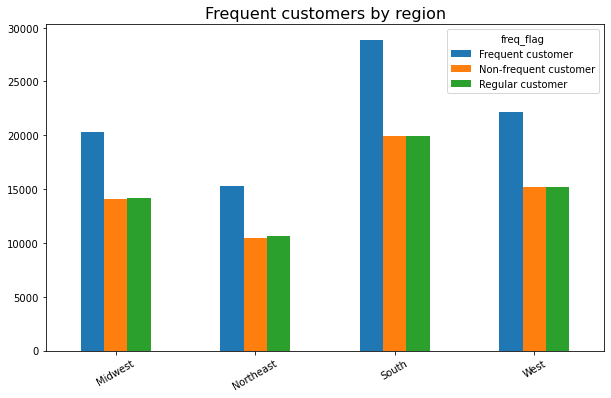

In [26]:
# Create a chart

freq_reg_bar = freq_reg.plot.bar(xlabel = (''), figsize = (10, 6), rot = 30)

plt.title('Frequent customers by region', fontsize=16)

In [27]:
# Export chart outside of Jupyter in the form of an image file

freq_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freq_reg_bar.png'))

In [28]:
# Number of orders taken by high and low spenders by region 

loy_reg = pd.crosstab(index = df['region'], 
                                    columns = df['loyalty_flag'], 
                                    values = df['user_id'], 
                                    aggfunc = 'nunique')

In [29]:
# Check the output 

loy_reg

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,3991,26333,18195
Northeast,3027,19869,13492
South,5637,37491,25609
West,4362,28635,19568


Text(0.5, 1.0, 'Loyal customers by region')

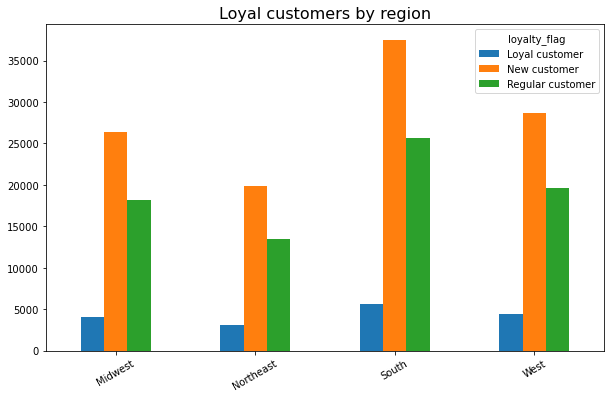

In [30]:
# Create a chart

loy_reg_bar = loy_reg.plot.bar(xlabel = (''), figsize = (10,6), rot = 30)

plt.title('Loyal customers by region', fontsize=16)

In [31]:
# Export chart outside of Jupyter in the form of an image file

loy_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loy_reg_bar.png'))

## 04. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [32]:
# Classify customers with orders number < 5 as 'low-active'

df.loc[df['max_order'] < 5, 'activity'] = 'low-active'

# Classify customers with order number >= 5 as 'normal-active'

df.loc[df['max_order'] >= 5, 'activity'] = 'normal-active'

In [33]:
# Check the number of 'normal' and 'low- active' customers

df.groupby('activity').user_id.nunique()

activity
low-active        43578
normal-active    162631
Name: user_id, dtype: int64

In [34]:
# Assign low active customers to new dataframe

low_active_customers = df[df['activity'] == 'low-active']

In [35]:
low_active_customers.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,add_to_cart_order,reordered,max_order,loyalty_flag,avg_product_price,spending_flag,median_order_freq,freq_flag,region,activity
729,168851,Male,South Carolina,30,1/1/2017,0,single,63712,102,Danish Butter Cookies,...,1,0,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active
730,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,3,0,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active
731,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,2,1,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active
732,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,1,1,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active
733,168851,Male,South Carolina,30,1/1/2017,0,single,63712,196,Soda,...,2,0,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active


In [36]:
# Check the shape of low_active_customers df

low_active_customers.shape

(1440295, 28)

In [37]:
# Assign normal active customers to new dataframe

active_customers = df[df['activity'] == 'normal-active']

In [38]:
active_customers.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,add_to_cart_order,reordered,max_order,loyalty_flag,avg_product_price,spending_flag,median_order_freq,freq_flag,region,activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,1,0,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active


In [39]:
active_customers.shape

(30964564, 28)

In [40]:
# Export low_active_customers df

low_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_active_customers.pkl'))

## 05. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


### a) Age groups

In [41]:
# Check the min value for column 'age'

active_customers['age'].min()

'18'

In [42]:
# Check the max value for column 'age'

active_customers['age'].max()

'81'

In [43]:
# Change the data type for age column

# Change data type of new columns to 'category'

active_customers['age'] = active_customers['age'].astype('int')

<ipython-input-43-40806de9b60c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers['age'] = active_customers['age'].astype('int')


In [44]:
# Create a new column with age groups 

active_customers.loc[active_customers['age'] <= 29, 'age_group'] = '18-29'
active_customers.loc[(active_customers['age'] > 29) & 
                     (active_customers['age'] < 40), 'age_group'] = '30-39'
active_customers.loc[(active_customers['age'] > 39) & 
                     (active_customers['age'] < 50), 'age_group'] = '40-49'
active_customers.loc[(active_customers['age'] > 49) & 
                     (active_customers['age'] < 65), 'age_group'] = '50-65'
active_customers.loc[(active_customers['age'] >= 65), 'age_group'] = '65+'



/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [45]:
# Check the frequency of age_group column

active_customers.groupby('age_group').user_id.nunique()

age_group
18-29    30376
30-39    25284
40-49    25697
50-65    38024
65+      43250
Name: user_id, dtype: int64

In [46]:
# Create a variable 

age = active_customers.groupby('age_group').user_id.nunique()


Text(0.5, 1.0, 'Customers by age group')

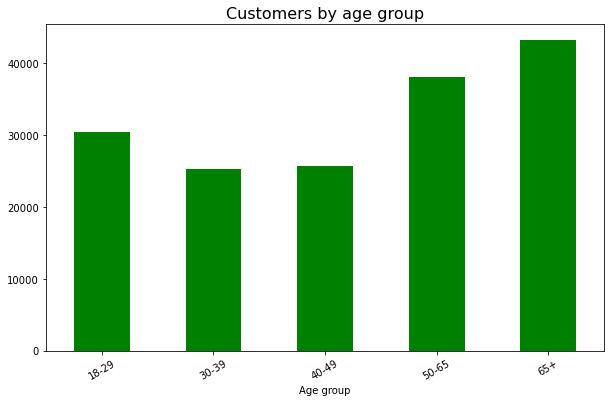

In [47]:
# Create plot to show age groups frequency

age_bar = age.plot.bar(xlabel = ('Age group'), color = 'g', figsize = (10, 6), rot = 30)

plt.title('Customers by age group', fontsize = 16)


In [48]:
# Export chart outside of Jupyter in the form of an image file

age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))

Text(0.5, 1.0, 'Customers by age group')

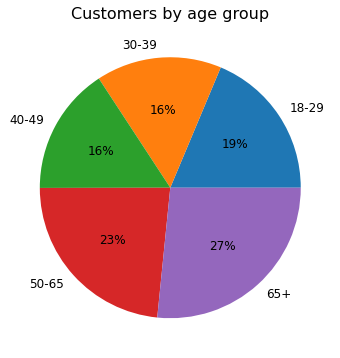

In [49]:
# Create a pie chart

age_pie = age.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6), title = 'Customers by family status')

plt.title('Customers by age group', fontsize = 16)

In [50]:
# Export chart outside of Jupyter in the form of an image file

age_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_pie.png'))

In [51]:
# Create a pivot table

age_reg = pd.crosstab(index = active_customers['age_group'], 
                                    columns = active_customers['region'], 
                                    values = active_customers['user_id'], 
                                    aggfunc = 'nunique')

In [52]:
# Check the output 

age_reg

region,Midwest,Northeast,South,West
age_group,,,,
18-29,7062,5261,10267,7786
30-39,5917,4510,8439,6418
40-49,6221,4545,8445,6486
50-65,9007,6685,12609,9723
65+,10169,7580,14433,11068


Text(0.5, 1.0, 'Customers by age group and region')

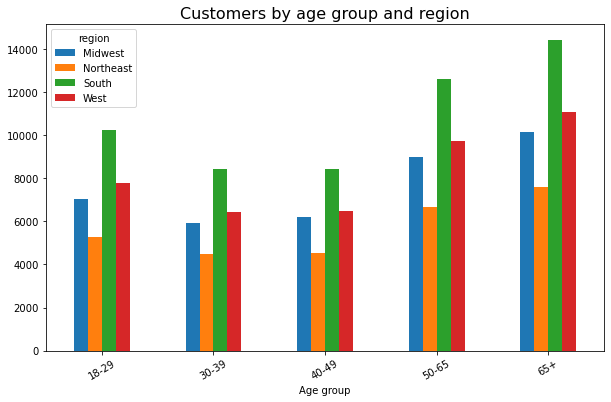

In [53]:
# Create a chart 

age_reg_bar = age_reg.plot.bar(xlabel = ('Age group'), figsize = (10, 6), rot = 30)

plt.title('Customers by age group and region', fontsize = 16)

In [54]:
# Export chart outside of Jupyter in the form of an image file

age_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_reg_bar.png'))

In [55]:
# Assigh a name for each age group

active_customers.loc[active_customers['age_group'] == '18-29', 'age_group_name'] = 'young adult'
active_customers.loc[active_customers['age_group'] == '30-39', 'age_group_name'] = 'adult'
active_customers.loc[active_customers['age_group'] == '40-49', 'age_group_name'] = 'middle-aged adult'
active_customers.loc[active_customers['age_group'] == '50-65', 'age_group_name'] = 'late middle-aged adult'
active_customers.loc[active_customers['age_group'] == '65+', 'age_group_name'] = 'senior'

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [56]:
# Check the frequency of age_group_name column

active_customers.groupby('age_group_name').user_id.nunique()

age_group_name
adult                     25284
late middle-aged adult    38024
middle-aged adult         25697
senior                    43250
young adult               30376
Name: user_id, dtype: int64

### b) Income category

In [57]:
# Check min value for income column

active_customers['income'].min()

25903

In [58]:
# Check max value for income column

active_customers['income'].max()

593901

In [59]:
# Create a new column with income categories

active_customers.loc[active_customers['income'] <= 50000, 'income_category'] = 'low-income'
active_customers.loc[(active_customers['income'] > 50000) & 
                     (active_customers['income'] < 100000), 'income_category'] = 'middle-income'
active_customers.loc[(active_customers['income'] >= 100000) & (active_customers['income'] < 300000), 'income_category'] = 'upper-income'
active_customers.loc[(active_customers['income'] >= 300000), 'income_category'] = 'high-income'

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [60]:
# Create a variable which stores unique number of user_id for each income_category

inc = active_customers.groupby('income_category').user_id.nunique()

In [61]:
active_customers.order_id.nunique()

3064375

In [62]:
# Create a variable which stores unique number of user_id for each income_category

order = active_customers.groupby('income_category').order_id.nunique()

In [63]:

order

income_category
high-income         8623
low-income        428540
middle-income    1288859
upper-income     1338353
Name: order_id, dtype: int64

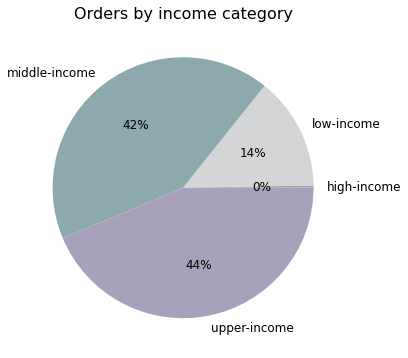

In [64]:
# Define your colors as strings
colors = ['#a6a6a6', '#d4d5d7', '#8ca9ad', '#a8a1bb']

# Assuming you have data in a DataFrame called 'order'
ord_inc_pie = order.plot.pie(y='', autopct='%.0f%%', fontsize=12, figsize=(10, 6), colors=colors)
ord_inc_pie.set_ylabel('')
plt.title('Orders by income category', fontsize=16)
plt.show()

In [65]:
# Export chart outside of Jupyter in the form of an image file

ord_inc_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ord_inc_pie.png'))

In [66]:
# Check the output 

inc

income_category
high-income        345
low-income       25192
middle-income    67358
upper-income     69736
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Customers by income category')

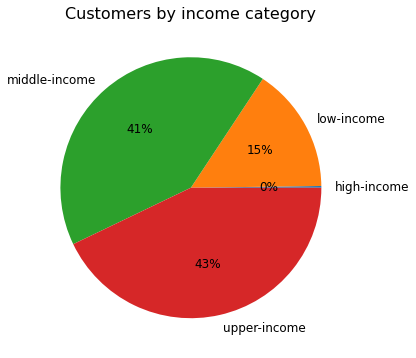

In [67]:
# Create a pie chart

inc_pie = inc.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6), title = 'Customers by family status')

plt.title('Customers by income category', fontsize = 16)

In [68]:
# Export chart outside of Jupyter in the form of an image file

inc_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_pie.png'))

In [69]:
# Create a pivot table that shows count of customers with income category in each age group

inc_age = pd.crosstab(index = active_customers['age_group'], 
                          columns = active_customers['income_category'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

Text(0.5, 1.0, 'Customers by income category and age group')

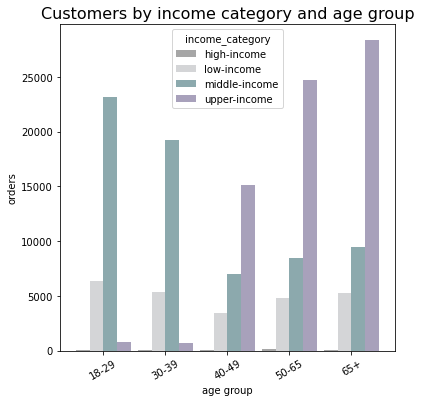

In [70]:
# Create a chart 
colors = ['#a6a6a6', '#d4d5d7', '#8ca9ad', '#a8a1bb']
inc_age_bar = inc_age.plot.bar(xlabel = ('age group'), ylabel = ('orders'), color=colors, rot = 30, figsize = (6, 6), width=0.9)
inc_age_bar.set_facecolor('none')
plt.title('Customers by income category and age group', fontsize = 16)

In [71]:
# Export chart outside of Jupyter in the form of an image file

inc_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_age.bar.png'))

In [72]:
# Create a pivot table 

inc_reg = pd.crosstab(index = active_customers['region'], 
                          columns = active_customers['income_category'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

Text(0.5, 1.0, 'Customers by income category and region')

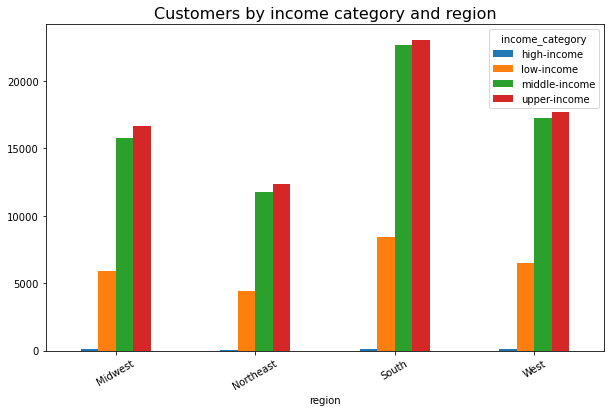

In [73]:
# Create a chart

inc_reg_bar = inc_reg.plot.bar(title = 'Customers by income category and region', rot = 30, figsize = (10, 6))

plt.title('Customers by income category and region', fontsize = 16)

In [74]:
# Export chart outside of Jupyter in the form of an image file

inc_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_reg_bar.png'))

### c) Household type 

In [75]:
active_customers.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,loyalty_flag,avg_product_price,spending_flag,median_order_freq,freq_flag,region,activity,age_group,age_group_name,income_category
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income


In [76]:
# Create a variable

fam = active_customers.groupby('fam_status').user_id.nunique()

In [77]:
# Check the output 

fam

fam_status
divorced/widowed                     13831
living with parents and siblings      7608
married                             114296
single                               26896
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Customers by family status')

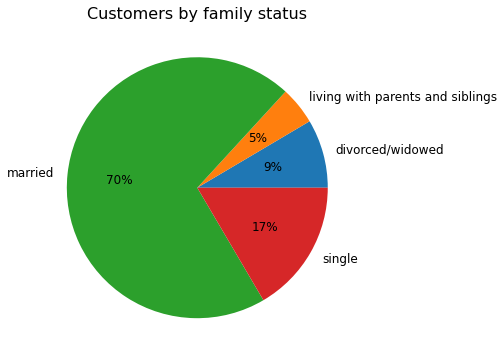

In [78]:
# Create a pie chart 

fam_pie = fam.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6), title = 'Customers by family status')

plt.title('Customers by family status', fontsize = 16)

In [79]:
# Export chart outside of Jupyter in the form of an image file

fam_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_pie.png'))

In [80]:
# Create a variable

dep = active_customers.groupby('n_dependants').user_id.nunique()

In [81]:
# check the output 

dep

n_dependants
0    40727
1    40689
2    40603
3    40612
Name: user_id, dtype: int64

In [82]:
# Create a 'living with parents' category within new family_type column

active_customers.loc[(active_customers['fam_status'] == 'living with parents and siblings'), 
                     'household_type'] = 'living with parents'

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [83]:
# Create a 'one-person household' category within new family_type column
active_customers.loc[(active_customers['fam_status'].isin(['single', 'divorced/widowed'])) & 
                         (active_customers['n_dependants'] == 0), 'household_type'] = 'one-person household'

# Create a 'single with dependants' category within new family_type column
active_customers.loc[(active_customers['fam_status'].isin(['single', 'divorced/widowed'])) & 
                        (active_customers['n_dependants'] > 0), 'household_type'] = 'single with dependants'

# Create a 'marriage without dependants' category within new family_type column
active_customers.loc[(active_customers['fam_status'] == 'married') & 
                     (active_customers['n_dependants'] == 0), 'household_type'] = 'marriage without dependants' 

# Create a family category within new family_type column
active_customers.loc[(active_customers['fam_status'] == 'married') & 
                     (active_customers['n_dependants'] == 1), 'household_type'] = 'small family' 

# Create a 'medium family' category within new family_type column
active_customers.loc[(active_customers['fam_status'] == 'married') & 
                     (active_customers['n_dependants'] == 2), 'household_type'] = 'medium family' 

# Create a 'big family' category within new family_type column
active_customers.loc[(active_customers['fam_status'] == 'married') & 
                     (active_customers['n_dependants'] == 3), 'household_type'] = 'large family' 

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [84]:
# Create a variable with unique number of users for each household_type

hou = active_customers.groupby('household_type').user_id.nunique()

In [85]:
# Check the output 

hou

household_type
large family            38111
living with parents      7608
medium family           38050
one-person household    40727
small family            38135
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Customers by household type')

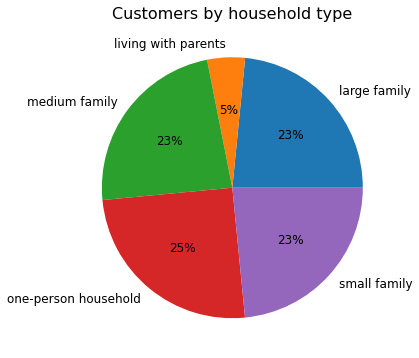

In [86]:
# Create a pie chart to demonstrate % distribution of customers by household type

hou_pie = hou.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6))

plt.title('Customers by household type', fontsize = 16)

In [87]:
# Export chart outside of Jupyter in the form of an image file

hou_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hou_pie.png'))

In [88]:
# Create a variable with unique number of users for each household_type

ord_fam_typ = active_customers.groupby('household_type').order_id.nunique()
ord_fam_typ

household_type
large family            721292
living with parents     145377
medium family           715360
one-person household    767754
small family            714592
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Customers by household type')

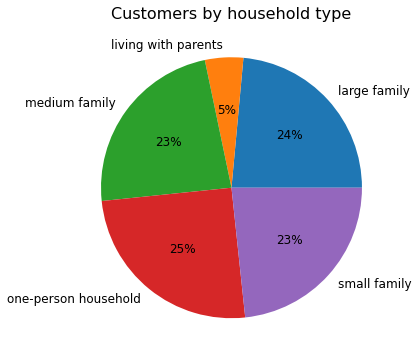

In [89]:
# Create a pie chart to demonstrate % distribution of customers by household type

ord_fam_typ_pie = ord_fam_typ.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6))

plt.title('Customers by household type', fontsize = 16)

In [90]:
# Create a pivot table frequency flag and household type

day_house = pd.crosstab(index = active_customers['order_hour'], 
                          columns = active_customers['age_group'], 
                          values = active_customers['order_id'], 
                          aggfunc = 'nunique')

Text(0.5, 1.0, 'Orders by hour and age group')

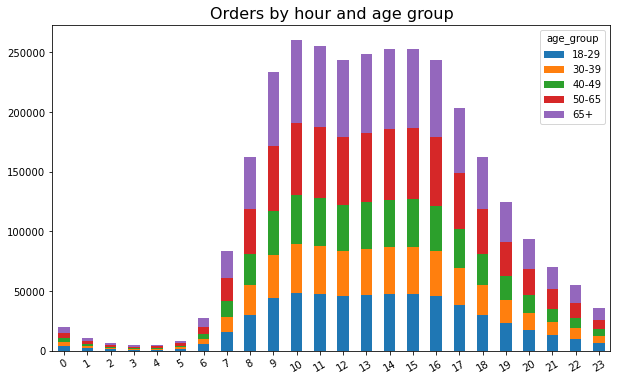

In [91]:
# Create a plot 

day_house_bar = day_house.plot.bar(xlabel = (''), stacked = True, title = 'Orders by household type and frequency', rot = 30, figsize = (10, 6))

plt.title('Orders by hour and age group', fontsize = 16)

In [92]:
# Create a pivot table

inc_hou = pd.crosstab(index = active_customers['income_category'],
                          columns = active_customers['household_type'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [93]:
# Check the output

inc_hou

household_type,large family,living with parents,medium family,one-person household,small family
income_category,,,,,
high-income,74,7,94,84,86
low-income,5778,1564,5738,6348,5764
middle-income,14851,5816,14940,16844,14907
upper-income,17408,221,17278,17451,17378


Text(0.5, 1.0, 'Customers by household type and income category')

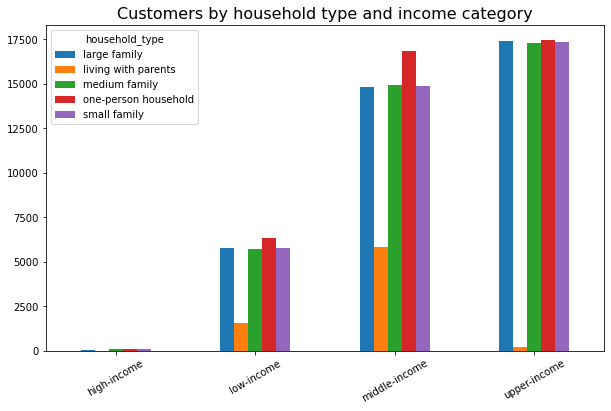

In [94]:
# Create a plot 

inc_hou_bar = inc_hou.plot.bar(xlabel = (''), title = 'Customers by household type and income category', rot = 30, figsize = (10, 6))

plt.title('Customers by household type and income category', fontsize = 16)

In [95]:
# Export chart outside of Jupyter in the form of an image file

inc_hou_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_hou_bar.png'))

In [96]:
# Create a pivot table

inc_hou_ord = pd.crosstab(index = active_customers['income_category'],
                          columns = active_customers['household_type'], 
                          values = active_customers['order_id'], 
                          aggfunc = 'nunique')

In [97]:
# Check the output

inc_hou_ord

household_type,large family,living with parents,medium family,one-person household,small family
income_category,,,,,
high-income,1946,220,2238,2155,2064
low-income,99673,26595,97101,107488,97683
middle-income,285612,114247,284131,321006,283863
upper-income,334061,4315,331890,337105,330982


Text(0.5, 1.0, 'Orders by household type and income category')

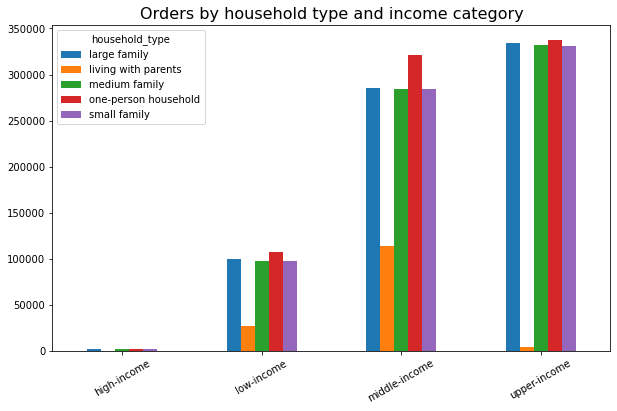

In [98]:
# Create a plot

inc_hou_ord_bar = inc_hou_ord.plot.bar(xlabel = (''), title = 'Orders by household type and income category', rot = 30, figsize = (10, 6))

plt.title('Orders by household type and income category', fontsize = 16)


In [99]:
# Export chart outside of Jupyter in the form of an image file

inc_hou_ord_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_hou_ord_bar.png'))

In [100]:
# Create a pivot table 

reg_hou = pd.crosstab(index = active_customers['region'],
                          columns = active_customers['household_type'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [101]:
# Check the output 

reg_hou

household_type,large family,living with parents,medium family,one-person household,small family
region,,,,,
Midwest,8985,1840,8990,9566,8995
Northeast,6652,1226,6692,7255,6756
South,12742,2604,12602,13537,12708
West,9732,1938,9766,10369,9676


Text(0.5, 1.0, 'Customers by state and household type')

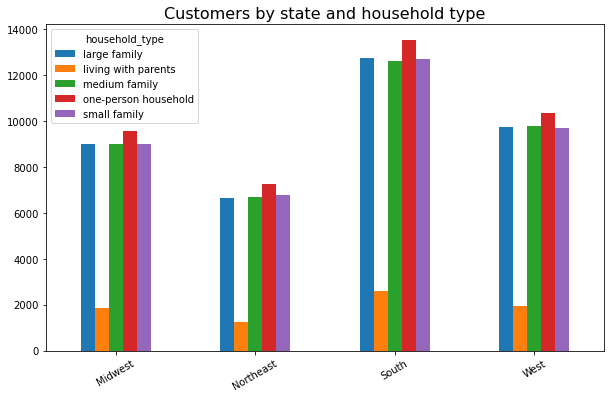

In [102]:
# Create a plot

reg_hou_bar = reg_hou.plot.bar(xlabel = (''), title = 'Customers by state and household type', rot = 30, figsize = (10, 6))

plt.title('Customers by state and household type', fontsize = 16)

In [103]:
# Export chart outside of Jupyter in the form of an image file

reg_hou_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_hou_bar.png'))

In [104]:
# Create a pivot table

hou_spe = pd.crosstab(index = active_customers['household_type'],
                          columns = active_customers['spending_flag'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [105]:
# Check the output 

hou_spe

spending_flag,High spender,Low spender
household_type,,
large family,880,37231
living with parents,169,7439
medium family,891,37159
one-person household,926,39801
small family,834,37301


Text(0.5, 1.0, 'Spenders by household type')

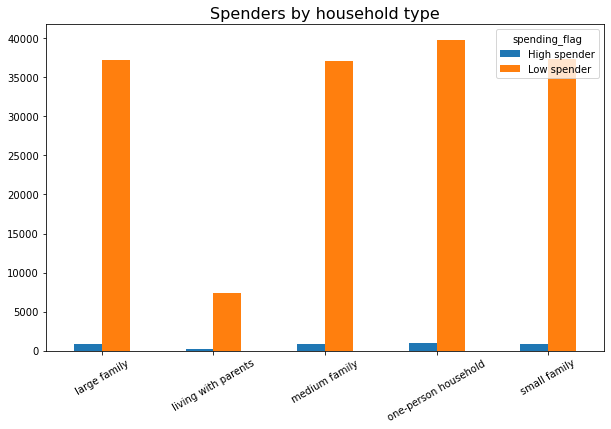

In [106]:
# Create a chart

hou_spe_bar = hou_spe.plot.bar(xlabel = (''), title = 'Spenders by household type', rot = 30, figsize = (10, 6))

plt.title('Spenders by household type', fontsize = 16)

In [107]:
# Export chart outside of Jupyter in the form of an image file

hou_spe_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hou_spe_bar.png'))

In [108]:
# Create a pivot table

hou_loy = pd.crosstab(index = active_customers['household_type'],
                          columns = active_customers['loyalty_flag'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [109]:
# Check the output 

hou_loy

loyalty_flag,Loyal customer,New customer,Regular customer
household_type,,,
large family,4011,16015,18085
living with parents,810,3162,3636
medium family,3985,16032,18033
one-person household,4267,17256,19204
small family,3944,16285,17906


Text(0.5, 1.0, 'Loyal customers by household type')

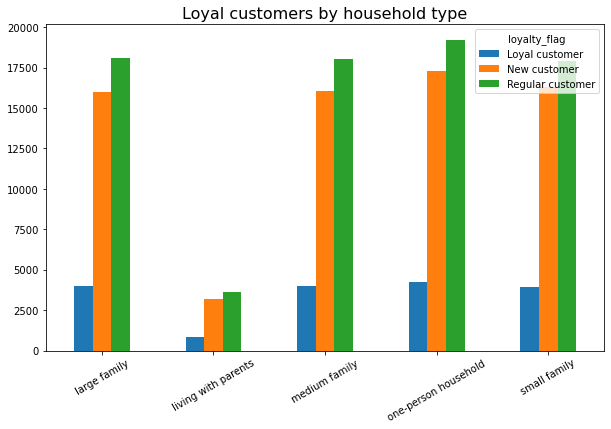

In [110]:
# Create a plot

hou_loy_bar = hou_loy.plot.bar(xlabel = (''), title = 'Loyal customers by household type', rot = 30, figsize = (10, 6))

plt.title('Loyal customers by household type', fontsize = 16)

In [111]:
# Export chart outside of Jupyter in the form of an image file

hou_loy_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hou_loy_bar.png'))

### Multidimensional customer profile 

In [112]:
active_customers.columns

Index(['user_id', 'gender', 'state', 'age', 'joining_date', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_order_freq', 'freq_flag',
       'region', 'activity', 'age_group', 'age_group_name', 'income_category',
       'household_type'],
      dtype='object')

In [113]:
# Combine the categories created above to create a multidimensional customer profile

# Creating combined customer profile based on 'Young single' person
active_customers.loc[(active_customers['age_group_name'] == 'young adult') & 
                     (active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'working class young single'
active_customers.loc[(active_customers['age_group_name'] == 'young adult') & 
                     (active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'].isin(['living with parent', 'one-person household'])), 
                     'household_class&type'] = 'middle class young single'
active_customers.loc[(active_customers['age_group_name'] == 'young adult') & 
                     (active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'upper-middle class young single'
active_customers.loc[(active_customers['age_group_name'] == 'young adult') & 
                     (active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'higher class young single'


/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [114]:
# Creating combined customer profile based on 'Single' person

active_customers.loc[(active_customers['age_group_name'] != 'young adult') & 
                     (active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'working class single'
active_customers.loc[(active_customers['age_group_name'] != 'young adult') & 
                     (active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'middle class single'
active_customers.loc[(active_customers['age_group_name'] != 'young adult') & 
                     (active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'upper-middle class single'
active_customers.loc[(active_customers['age_group_name'] != 'young adult') & 
                     (active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'higher class single'

In [115]:
# Creating combined customer profile based on 'Small family'

active_customers.loc[(active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'] == 'small family'),
                      'household_class&type'] = 'working class small family' 
active_customers.loc[(active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'] == 'small family'),
                      'household_class&type'] = 'middle class small family'
active_customers.loc[(active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'] == 'small family'),
                      'household_class&type'] = 'upper-middle class small family' 
active_customers.loc[(active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'] == 'small family'),
                      'household_class&type'] = 'upper class small family'

In [116]:
# Creating combined customer profile based on 'Medium family'

active_customers.loc[(active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'] == 'medium family'),
                      'household_class&type'] = 'working class medium family' 
active_customers.loc[(active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'] == 'medium family'),
                      'household_class&type'] = 'middle class medium family'
active_customers.loc[(active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'] == 'medium family'),
                      'household_class&type'] = 'upper-middle class medium family' 
active_customers.loc[(active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'] == 'medium family'),
                      'household_class&type'] = 'upper class medium family'

In [117]:
# Creating combined customer profile based on 'Large family'
 
active_customers.loc[(active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'] == 'large family'),
                      'household_class&type'] = 'working class large family' 
active_customers.loc[(active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'] == 'large family'),
                      'household_class&type'] = 'middle class large family'
active_customers.loc[(active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'] == 'large family'),
                      'household_class&type'] = 'upper-middle class large family' 
active_customers.loc[(active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'] == 'large family'),
                      'household_class&type'] = 'upper class large family'

In [118]:
# Check frequency for household_class&type column

hou_cla_typ = active_customers.groupby('household_class&type').user_id.nunique()

In [119]:
# Check the output 

hou_cla_typ

household_class&type
higher class single                    74
higher class young single              17
middle class large family           14851
middle class medium family          14940
middle class single                 11025
middle class small family           14907
middle class young single            5819
upper class large family               74
upper class medium family              94
upper class small family               86
upper-middle class large family     17408
upper-middle class medium family    17278
upper-middle class single           17245
upper-middle class small family     17378
upper-middle class young single       427
working class large family           5778
working class medium family          5738
working class single                 4681
working class small family           5764
working class young single           3231
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Distribution of Household Types and Classes')

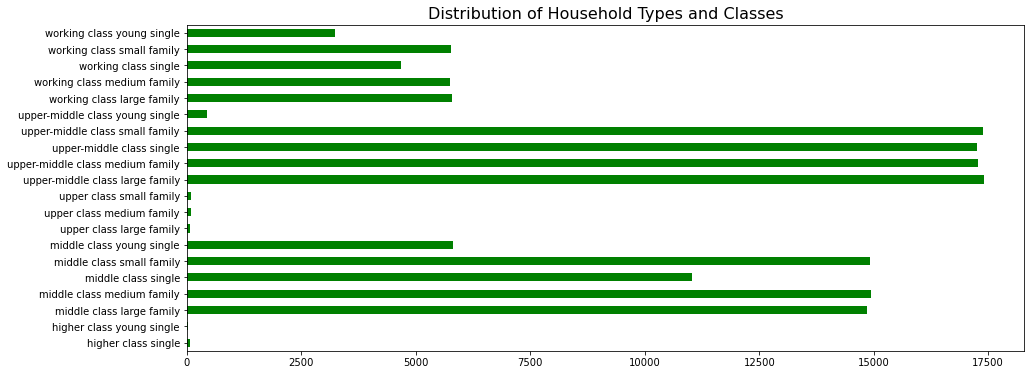

In [120]:
# Create a chart

hou_cla_typ_bar = hou_cla_typ.plot.barh(xlabel = (''), color = 'g', figsize=(15,6))

plt.title('Distribution of Household Types and Classes', fontsize = 16)


In [121]:
# Export chart outside of Jupyter in the form of an image file

hou_cla_typ_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hou_cla_typ_bar.png'))

In [122]:
# Check the first 5 row of df

active_customers.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,spending_flag,median_order_freq,freq_flag,region,activity,age_group,age_group_name,income_category,household_type,household_class&type
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low spender,19.0,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family


In [123]:
active_customers.dtypes

user_id                     object
gender                    category
state                     category
age                          int64
joining_date                object
n_dependants                 int64
fam_status                category
income                       int64
product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int64
order_number                 int64
orders_day_of_week           int64
order_hour                   int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
max_order                    int64
loyalty_flag              category
avg_product_price          float64
spending_flag             category
median_order_freq          float64
freq_flag                 category
region                      object
activity                    object
age_group           

In [124]:
# Change data type of new columns to 'category'

active_customers[['region', 'activity', 'income_category', 'household_type', 'age_group_name', 'household_class&type']] = active_customers[['region', 'activity', 'income_category', 'household_type', 'age_group_name', 'household_class&type']].astype('category')

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### e) Departaments preferencies

In [125]:
# Import the departments.csv dataframe from the csv file

deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [126]:
# Check the output

deps

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [127]:
# Change the header

new_header = ['department_id', 'department']

In [128]:
# Alocate new header

deps.columns = new_header

In [129]:
# Check the output

deps

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [130]:
# Merge departments with active_customers df using 'department_id' column as a key

active_customers = active_customers.merge(deps, on = 'department_id', indicator = True)

In [131]:
# Print the first 5 rows of active_customers df

active_customers.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,freq_flag,region,activity,age_group,age_group_name,income_category,household_type,household_class&type,department,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family,beverages,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family,beverages,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family,beverages,both
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,Non-frequent customer,West,normal-active,30-39,adult,middle-income,one-person household,middle class single,beverages,both
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,Non-frequent customer,West,normal-active,30-39,adult,middle-income,one-person household,middle class single,beverages,both


In [132]:
# Change data type for department column

active_customers['department'] = active_customers['department'].astype('category')

In [133]:
# Remove the _merge column

active_customers.drop(columns = ['_merge'], inplace = True)

In [134]:
# Create a variable that counts frequency of department  

dep = active_customers['department'].value_counts(dropna = False)

In [135]:
# Check the output

dep

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

Text(0.5, 1.0, 'Distribution of departments')

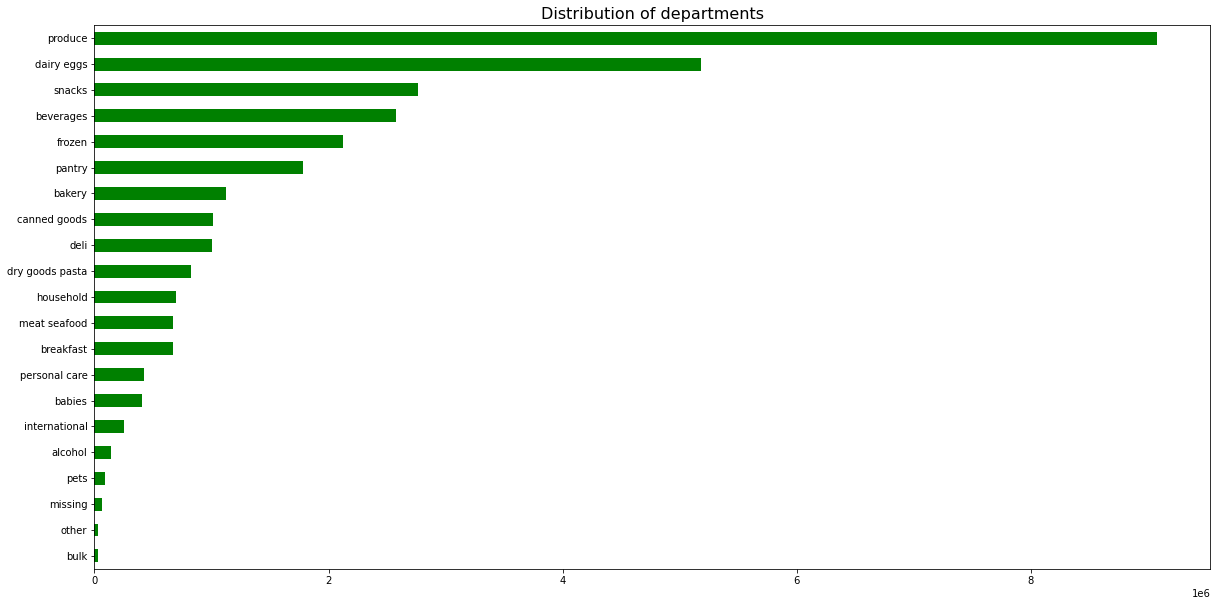

In [136]:
# Create a chart which shows distribution of the “department” column

dep_bar = dep.sort_values(ascending=True).plot.barh(xlabel = (''), title = 'Distribution of departments', color = 'g', figsize = (20, 10))

plt.title('Distribution of departments', fontsize = 16)

In [137]:
# Export chart outside of Jupyter in the form of an image file

dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_bar.png'))

In [138]:
# Create a pivot table with department preferencies by household_class&type (agg sum of spendings)

hous_dep = pd.crosstab(index=active_customers['household_class&type'],
                      columns=active_customers['department'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [139]:
# Check the output

hous_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
household_class&type,,,,,,,,,,,,,,,,,,,,,
higher class single,830.0,214.0,1078.0,2286.0,591.0,NaN,952.0,3758.0,733.0,583.0,...,991.0,205.0,483.0,24.0,53.0,1554.0,259.0,389.0,4587.0,2152.0
higher class young single,95.0,12.0,305.0,399.0,108.0,1.0,257.0,775.0,95.0,220.0,...,401.0,53.0,129.0,5.0,7.0,425.0,118.0,8.0,843.0,423.0
middle class large family,13089.0,40269.0,107070.0,231540.0,62039.0,3150.0,98868.0,496163.0,96934.0,81176.0,...,64434.0,24638.0,67939.0,6337.0,3151.0,170185.0,40507.0,7796.0,887866.0,242892.0
middle class medium family,11483.0,40314.0,105833.0,237762.0,62750.0,3362.0,98599.0,497871.0,94653.0,79955.0,...,65304.0,25054.0,66743.0,6434.0,3257.0,171067.0,40404.0,8758.0,888364.0,248414.0
middle class single,9513.0,30730.0,79039.0,174553.0,44389.0,2256.0,71605.0,366888.0,71254.0,57485.0,...,46583.0,18361.0,47782.0,4661.0,2370.0,122911.0,29990.0,5998.0,644701.0,182863.0
middle class small family,12227.0,39380.0,107329.0,235290.0,62614.0,3344.0,98078.0,504395.0,95280.0,79982.0,...,65439.0,25606.0,66894.0,6019.0,3262.0,172148.0,40562.0,9235.0,876713.0,245046.0
middle class young single,4724.0,16818.0,42290.0,90844.0,24136.0,1166.0,39728.0,195563.0,37637.0,32553.0,...,24801.0,10164.0,27083.0,2577.0,1295.0,68448.0,15694.0,3545.0,353603.0,89790.0
upper class large family,721.0,110.0,1176.0,2172.0,535.0,NaN,982.0,3677.0,696.0,732.0,...,1268.0,218.0,771.0,20.0,31.0,1365.0,364.0,124.0,5585.0,2155.0
upper class medium family,557.0,105.0,1247.0,2288.0,605.0,3.0,947.0,3830.0,622.0,678.0,...,920.0,204.0,501.0,35.0,45.0,1619.0,355.0,48.0,4911.0,2032.0


In [140]:
# Create a pivot table with department preferencies by age group

age_dep = pd.crosstab(index=active_customers['department'],
                      columns=active_customers['age_group'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [141]:
# Check the output

age_dep

age_group,18-29,30-39,40-49,50-65,65+
department,,,,,
alcohol,27938,23718,22437,33841,36693
babies,77758,63698,67072,95660,106204
bakery,210358,175644,176611,262218,295997
beverages,477655,396518,406669,607039,684020
breakfast,128115,103824,106309,157306,175296
bulk,6414,5210,5384,7498,8945
canned goods,192170,157546,158811,236038,267509
dairy eggs,975307,816326,819115,1194762,1366795
deli,188533,157312,158399,234391,265199


In [142]:
# Sort values 

age_dep = age_dep.loc[age_dep.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 1.0, 'Departments preferencies by age group')

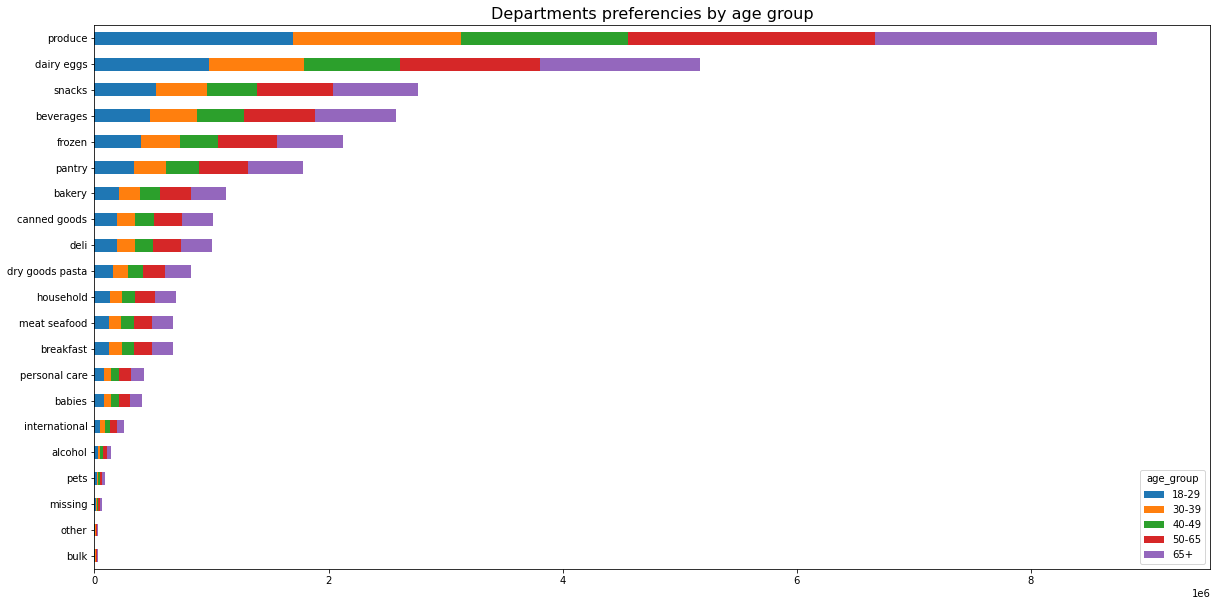

In [143]:
# Create a chart

age_dep_bar = age_dep.plot.barh(xlabel = (''), stacked = True, figsize=(20,10))

plt.title('Departments preferencies by age group', fontsize = 16)

In [144]:
# Export chart outside of Jupyter in the form of an image file

age_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dep_bar.png'))

In [145]:
# Create a pivot table with department preferencies by income category

inc_dep = pd.crosstab(index=active_customers['department'],
                      columns=active_customers['income_category'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [146]:
# Sort values 

inc_dep = inc_dep.loc[inc_dep.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 1.0, 'Departments by income category')

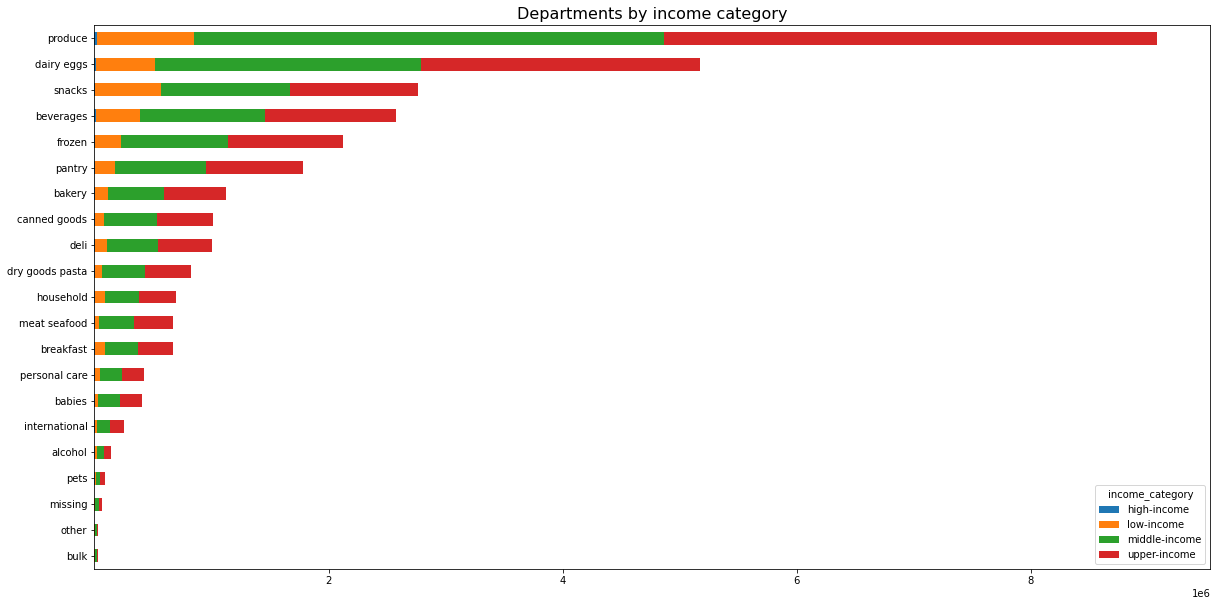

In [147]:
# Create a chart

inc_dep_bar = inc_dep.plot.barh(xlabel = (''), stacked = True, figsize=(20, 10))

plt.title('Departments by income category', fontsize = 16)

In [148]:
# Export chart outside of Jupyter in the form of an image file

inc_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_dep_bar.png'))

In [149]:
# Create a pivot table

reg_dep = pd.crosstab(index=active_customers['department'],
                      columns=active_customers['region'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [150]:
# Check the output 

reg_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1211283,913813,1721319,1325890
deli,234464,178398,333620,257352


In [151]:
# Sort values 

reg_dep = reg_dep.loc[reg_dep.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 1.0, 'Departments by regions')

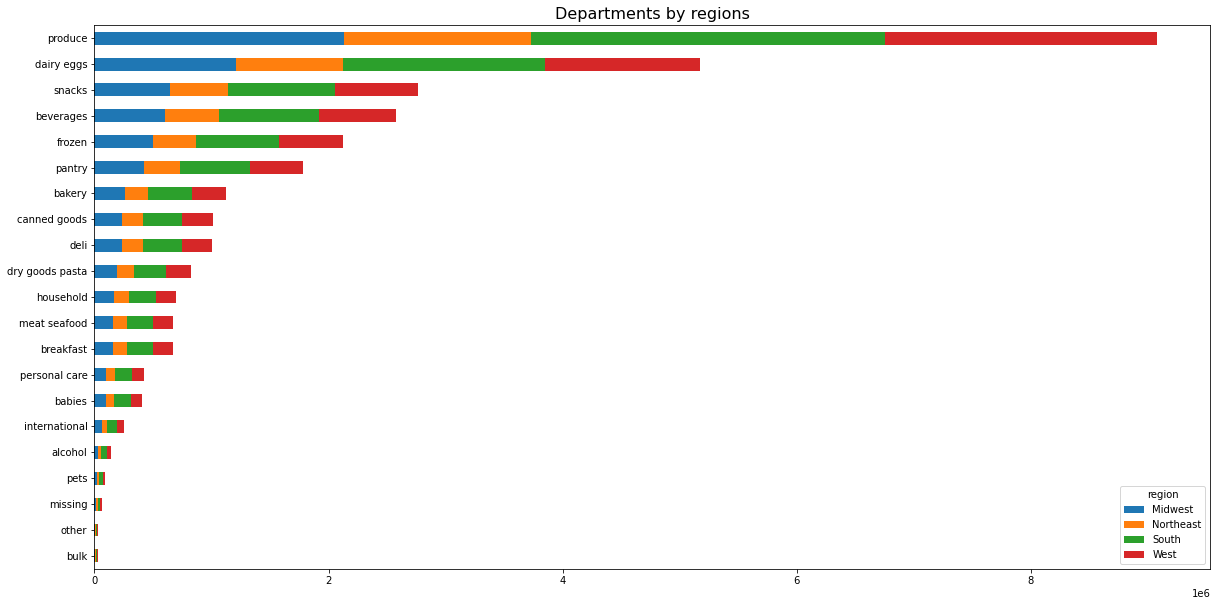

In [152]:
# Create a chart

reg_dep_bar = reg_dep.plot.barh(xlabel = (''), stacked = True, figsize=(20,10))

plt.title('Departments by regions', fontsize = 16)

In [153]:
# Export chart outside of Jupyter in the form of an image file

reg_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_dep_bar.png'))

In [154]:
# Create a pivot table

gen_dep = pd.crosstab(index=active_customers['department'],
                      columns=active_customers['gender'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [155]:
# Check the output 

gen_dep

gender,Female,Male
department,,
alcohol,74844,69783
babies,200641,209751
bakery,559143,561685
beverages,1280384,1291517
breakfast,334473,336377
bulk,16742,16709
canned goods,498501,513573
dairy eggs,2572245,2600060
deli,499243,504591


In [156]:
# Sort values 

gen_dep = gen_dep.loc[gen_dep.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 1.0, 'Departments by gender')

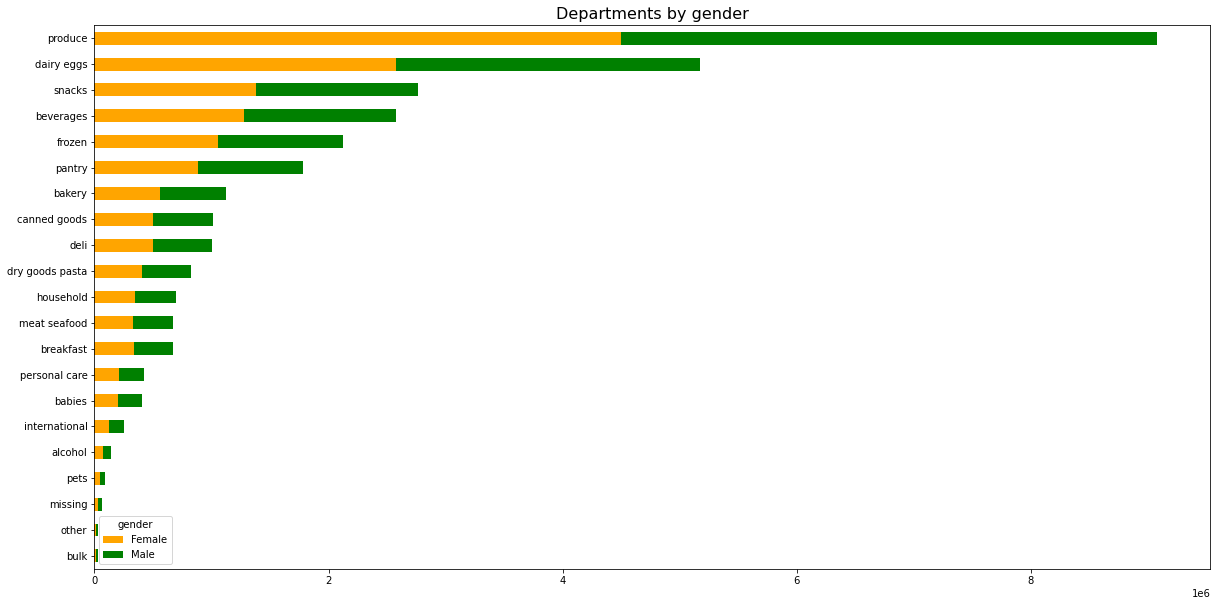

In [157]:
# Create a chart 

color = ('orange', 'green')

gen_dep_bar = gen_dep.plot.barh(xlabel = (''), stacked = True, color=color, figsize=(20, 10))

plt.title('Departments by gender', fontsize = 16)

In [158]:
# Export chart outside of Jupyter in the form of an image file

gen_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gen_dep_bar.png'))

### Day and hour

In [195]:
# Assign day do orders_day_of_week

active_customers.loc[(active_customers['orders_day_of_week'] == 0), 'day'] = 'saturday'
active_customers.loc[(active_customers['orders_day_of_week'] == 1), 'day'] = 'sunday'
active_customers.loc[(active_customers['orders_day_of_week'] == 2), 'day'] = 'monday'
active_customers.loc[(active_customers['orders_day_of_week'] == 3), 'day'] = 'tuesday'
active_customers.loc[(active_customers['orders_day_of_week'] == 4), 'day'] = 'wednesday'
active_customers.loc[(active_customers['orders_day_of_week'] == 5), 'day'] = 'thursday'
active_customers.loc[(active_customers['orders_day_of_week'] == 6), 'day'] = 'friday'


In [196]:
# Check the first 5 rows of df

active_customers.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,freq_flag,region,activity,age_group,age_group_name,income_category,household_type,household_class&type,department,day
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family,beverages,sunday
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family,beverages,thursday
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular customer,Midwest,normal-active,40-49,middle-aged adult,upper-income,large family,upper-middle class large family,beverages,sunday
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,Non-frequent customer,West,normal-active,30-39,adult,middle-income,one-person household,middle class single,beverages,friday
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,Non-frequent customer,West,normal-active,30-39,adult,middle-income,one-person household,middle class single,beverages,sunday


In [161]:
# Create a variable that groups unique number of orders taken each day

day = active_customers.groupby('day').order_id.nunique()

In [162]:
# Check the output 

day

day
1 monday       421534
2 tuesday      393439
3 wednesday    383531
4 thursday     407456
5 friday       397933
6 saturday     529224
7 sunday       531258
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Count of orders by day of the week')

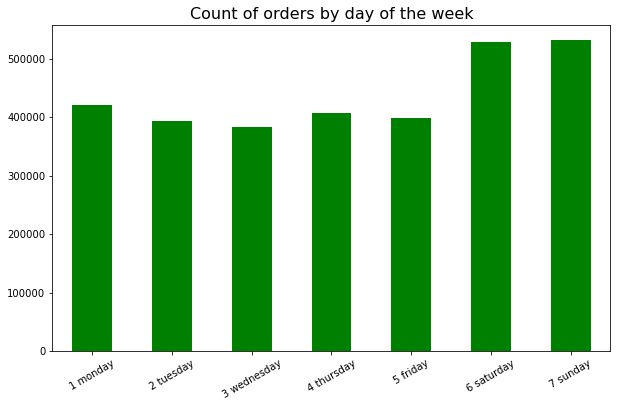

In [163]:
# Create a chart

day_bar = day.plot.bar(xlabel = (''), rot = 30, color = 'g', figsize=(10,6))

plt.title('Count of orders by day of the week', fontsize = 16)

In [164]:
# Export chart outside of Jupyter in the form of an image file

day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_bar.png'))

In [165]:
# Create a pivot table that shows unique number of orders taken by day of the week and age group

day_age = pd.crosstab(index=active_customers['day'], 
                      columns=active_customers['age_group'], 
                      values=active_customers['order_id'], 
                      aggfunc='nunique')

In [166]:
# Check the output

day_age

age_group,18-29,30-39,40-49,50-65,65+
day,,,,,
1 monday,78454,65577,66844,98906,111753
2 tuesday,73169,61227,62550,91530,104963
3 wednesday,71522,60110,60583,89580,101736
4 thursday,75982,63161,64360,95345,108608
5 friday,74407,60782,63537,92870,106337
6 saturday,99078,82406,83729,122943,141068
7 sunday,99758,83628,83792,123839,140241


Text(0.5, 1.0, 'Count of orders by age group and day of the week')

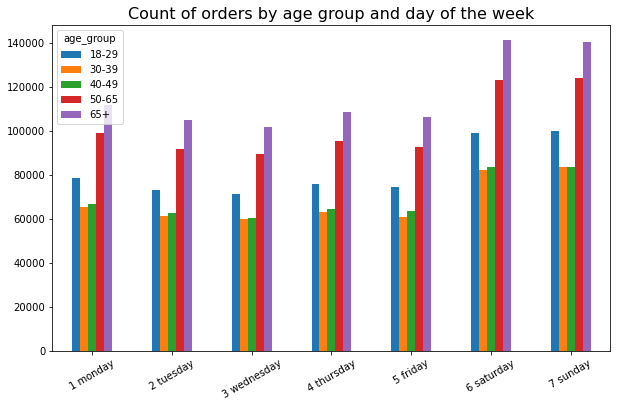

In [167]:
# Create a chart 

day_age_bar = day_age.plot.bar(xlabel = (''), rot = 30, figsize=(10,6))

plt.title('Count of orders by age group and day of the week', fontsize = 16)

In [168]:
# Export chart outside of Jupyter in the form of an image file

day_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_age_bar.png'))

In [169]:
# Create a pivot table that shows unique number of orders taken by day of the week and region

day_reg = pd.crosstab(index=active_customers['day'], 
                      columns=active_customers['region'], 
                      values=active_customers['order_id'], 
                      aggfunc='nunique')

In [170]:
# Check the output

day_reg

region,Midwest,Northeast,South,West
day,,,,
1 monday,99129,74423,140490,107492
2 tuesday,92266,69684,131080,100409
3 wednesday,89592,67734,127912,98293
4 thursday,95637,71877,135743,104199
5 friday,93535,69386,132938,102074
6 saturday,124518,93235,175658,135813
7 sunday,124615,93860,177558,135225


Text(0.5, 1.0, 'Count of orders by region and day of the week')

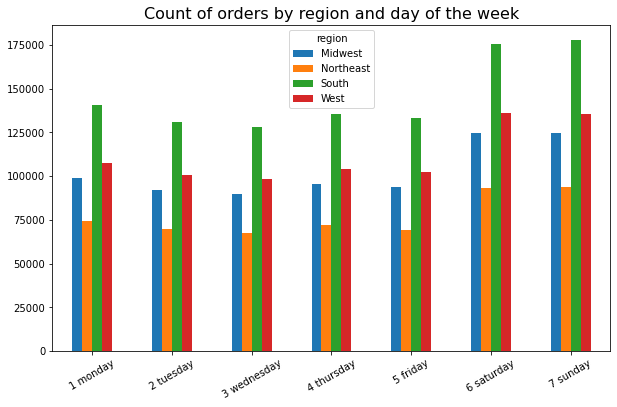

In [171]:
# Create a chart

day_reg_bar = day_reg.plot.bar(xlabel = (''), rot = 30, figsize=(10,6))

plt.title('Count of orders by region and day of the week', fontsize = 16)

In [172]:
# Export chart outside of Jupyter in the form of an image file

day_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_reg_bar.png'))

In [173]:
# Create a variable that groups unique number of orders taken each hour

hour = active_customers.groupby('order_hour').order_id.nunique()

In [174]:
# Check the output

hour

order_hour
0      20291
1      10975
2       6684
3       4850
4       4909
5       8554
6      27753
7      83635
8     161957
9     233810
10    260111
11    255570
12    243656
13    248713
14    252849
15    252989
16    243328
17    203002
18    161931
19    124716
20     93341
21     70100
22     54834
23     35817
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Total number of orders by hour')

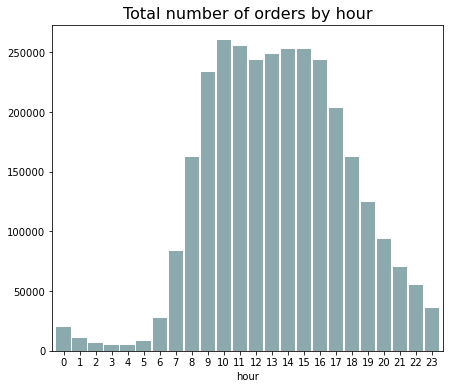

In [175]:
# Create a chart

hour_bar = hour.plot.bar(xlabel = ('hour'), rot = 360, color = '#8ca9ad', figsize=(7,6), width =0.9)
hour_bar.set_facecolor('none')
plt.title('Total number of orders by hour', fontsize = 16)

In [176]:
# Export chart outside of Jupyter in the form of an image file

hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_bar.png'))

In [177]:
# Create a pivot table that shows unique number of orders taken by hour and age group

hour_age = pd.crosstab(index=active_customers['order_hour'], 
                      columns=active_customers['age_group'], 
                      values=active_customers['order_id'], 
                      aggfunc='nunique')

In [178]:
# Check the output

hour_age.head()

age_group,18-29,30-39,40-49,50-65,65+
order_hour,,,,,
0,3832,3255,3200,4672,5332
1,2090,1689,1758,2539,2899
2,1338,1002,1056,1489,1799
3,944,755,747,1100,1304
4,942,757,725,1171,1314


Text(0.5, 1.0, 'Total count of orders by hour and age group')

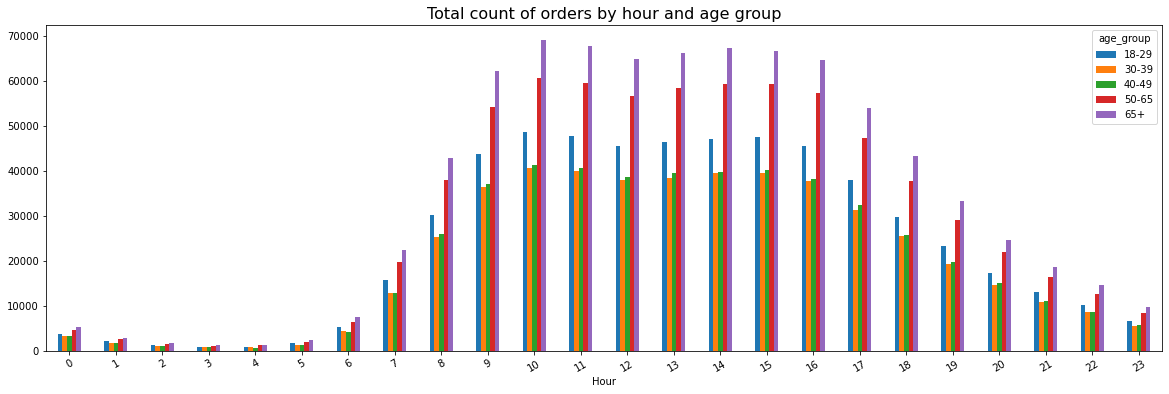

In [179]:
# Create a chart 

hour_age_bar = hour_age.plot.bar(xlabel = ('Hour'), rot = 30, figsize=(20,6))

plt.title('Total count of orders by hour and age group', fontsize = 16)

In [180]:
# Export chart outside of Jupyter in the form of an image file

hour_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_age_bar.png'))

In [181]:
# Create a pivot table that shows unique number of orders taken by hour and region

hour_reg = pd.crosstab(index=active_customers['order_hour'], 
                      columns=active_customers['region'], 
                      values=active_customers['order_id'], 
                      aggfunc='nunique')

In [182]:
# Check the output 

hour_reg.head()

region,Midwest,Northeast,South,West
order_hour,,,,
0,4704,3579,6805,5203
1,2630,1969,3577,2799
2,1606,1181,2171,1726
3,1087,864,1641,1258
4,1195,840,1649,1225


Text(0.5, 1.0, 'Total count of orders by hour and region')

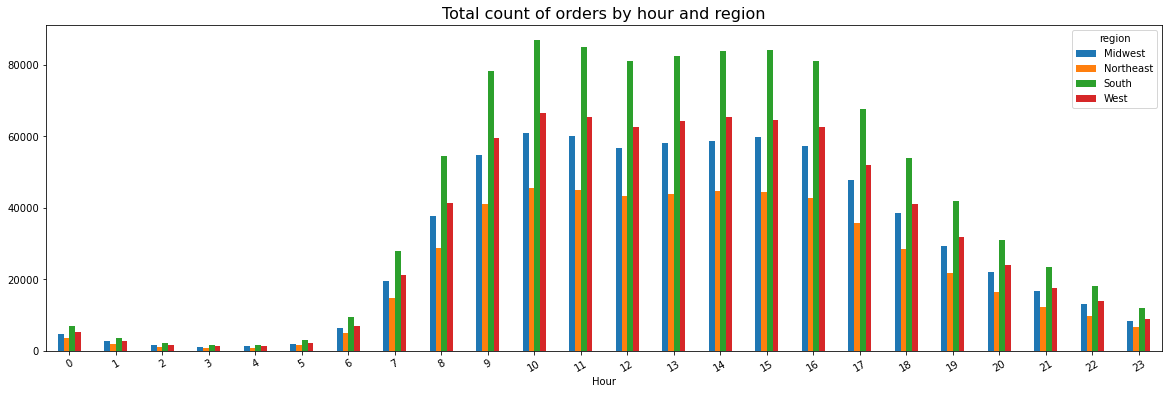

In [183]:
# Create a chart 

hour_reg_bar = hour_reg.plot.bar(xlabel = ('Hour'), rot = 30, figsize=(20,6))

plt.title('Total count of orders by hour and region', fontsize = 16)

In [184]:
# Export chart outside of Jupyter in the form of an image file

hour_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_reg_bar.png'))

In [185]:
# Export dataframe to pkl

active_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_customers.pkl'))

## 06. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [186]:
# Apply the agg() function to each 'age_group' to obtain the min, max, mean values for columns

active_customers.groupby('age_group').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique',  'mean'],
    'income': ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean']})

user_id order_id               income                        prices  \
          nunique  nunique          mean    min     max           mean    min   
age_group                                                                       
18-29       30376   572370  1.710152e+06  25937  396364   70664.695063    1.0   
30-39       25284   476891  1.711931e+06  25903  397929   70612.601560    1.0   
40-49       25697   485395  1.710153e+06  26154  592409  112186.734963    1.0   
50-65       38024   715013  1.710523e+06  29018  591089  115719.268413    1.0   
65+         43250   814706  1.709397e+06  29001  593901  115870.266216    1.0   

                          days_since_prior_order                   
            max      mean                    min   max       mean  
age_group                                                          
18-29      25.0  7.782198                    0.0  30.0  10.815269  
30-39      25.0  7.787961                    0.0  30.0  10.806490  
40-49      25.0  7.798234                    0.0  30.0  10.796786  
50-65      25.0  7.786995                    0.0  30.0  10.839010  
65+        25.0  7.796715                    0.0  30.0  10.791788

In [187]:
# Apply the agg() function to each 'region' to obtain the min, max, mean values for columns

active_customers.groupby('region').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique', 'mean'],
    'income': ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

user_id order_id               income                        prices  \
          nunique  nunique          mean    min     max           mean    min   
region                                                                          
Midwest     38376   719292  1.712476e+06  25903  579397  100380.647818    1.0   
Northeast   28581   540199  1.708338e+06  26095  584097   99745.286352    1.0   
South       54193  1021379  1.709595e+06  25911  591089   99242.561807    1.0   
West        41481   783505  1.710644e+06  25937  593901   99546.021028    1.0   

                          days_since_prior_order                  age      \
            max      mean                    min   max       mean min max   
region                                                                      
Midwest    25.0  7.792318                    0.0  30.0  10.892736  18  81   
Northeast  25.0  7.781441                    0.0  30.0  10.774220  18  81   
South      25.0  7.794439                    0.0  30.0  10.814227  18  81   
West       25.0  7.790308                    0.0  30.0  10.754622  18  81   

                      
                mean  
region                
Midwest    49.451335  
Northeast  49.605946  
South      49.320375  
West       49.580291

In [188]:
# Apply the agg() function to each 'income_category' to obtain the min, max, mean values for columns

active_customers.groupby('income_category').agg({
    'user_id' : ['nunique'], 
    'order_id' : ['nunique', 'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

user_id order_id               prices                  \
                nunique  nunique          mean    min   max      mean   
income_category                                                         
high-income         345     8623  1.693235e+06    1.0  25.0  7.755411   
low-income        25192   428540  1.709817e+06    1.0  25.0  6.707347   
middle-income     67358  1288859  1.710369e+06    1.0  25.0  7.889854   
upper-income      69736  1338353  1.710509e+06    1.0  25.0  7.954829   

                days_since_prior_order                  age                 
                                   min   max       mean min max       mean  
income_category                                                             
high-income                        0.0  30.0  10.094693  18  81  52.876596  
low-income                         0.0  30.0  11.175808  18  81  44.609113  
middle-income                      0.0  30.0  10.762150  18  81  39.330958  
upper-income                       0.0  30.0  10.774457  18  81  60.226900

In [189]:
# Apply the agg() function to each 'household_type' to obtain the min, max, mean values for columns

active_customers.groupby('household_type').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique', 'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

user_id order_id               income          \
                     nunique  nunique          mean    min     max   
household_type                                                       
large family           38111   721292  1.707194e+06  25941  591089   
living with parents     7608   145377  1.714525e+06  25937  396364   
medium family          38050   715360  1.710141e+06  25911  593901   
one-person household   40727   767754  1.712193e+06  25903  584097   
small family           38135   714592  1.710772e+06  26006  579397   

                                    prices                  \
                               mean    min   max      mean   
household_type                                               
large family          101586.428917    1.0  25.0  7.790888   
living with parents    70870.404339    1.0  25.0  7.800604   
medium family         101623.388701    1.0  25.0  7.784383   
one-person household   99896.801937    1.0  25.0  7.789550   
small family          101467.889805    1.0  25.0  7.795589   

                     days_since_prior_order                  age      \
                                        min   max       mean min max   
household_type                                                         
large family                            0.0  30.0  10.825634  22  81   
living with parents                     0.0  30.0  10.750995  18  21   
medium family                           0.0  30.0  10.822274  22  81   
one-person household                    0.0  30.0  10.791951  18  81   
small family                            0.0  30.0  10.814660  22  81   

                                 
                           mean  
household_type                   
large family          51.451197  
living with parents   19.502090  
medium family         51.587213  
one-person household  49.506436  
small family          51.448422

In [190]:
# Apply the agg() function to each 'household_class&type' to obtain the min, max, mean values for columns

active_customers.groupby('household_class&type').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique',  'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

user_id order_id                income  \
                                 nunique  nunique          mean     min   
household_class&type                                                      
higher class single                   74     1978  1.664818e+06  302526   
higher class young single             17      397  1.669692e+06  306040   
middle class large family          14851   285612  1.707399e+06   50005   
middle class medium family         14940   284131  1.708174e+06   50005   
middle class single                11025   210380  1.711029e+06   50002   
middle class small family          14907   283863  1.712772e+06   50001   
middle class young single           5819   110626  1.713880e+06   50019   
upper class large family              74     1946  1.707167e+06  302234   
upper class medium family             94     2238  1.724507e+06  302561   
upper class small family              86     2064  1.680417e+06  302363   
upper-middle class large family    17408   334061  1.707985e+06  100003   
upper-middle class medium family   17278   331890  1.711287e+06  100001   
upper-middle class single          17245   332798  1.712364e+06  100001   
upper-middle class small family    17378   330982  1.710410e+06  100000   
upper-middle class young single      427     8622  1.711303e+06  100006   
working class large family          5778    99673  1.702789e+06   25941   
working class medium family         5738    97101  1.712068e+06   25911   
working class single                4681    79507  1.717338e+06   25903   
working class small family          5764    97683  1.705547e+06   26006   
working class young single          3231    54576  1.714938e+06   25937   

                                                        prices        \
                                     max           mean    min   max   
household_class&type                                                   
higher class single               584097  414041.635229    1.0  25.0   
higher class young single         396364  332111.881142    1.0  24.5   
middle class large family          99999   76688.673566    1.0  25.0   
middle class medium family         99999   76973.995636    1.0  25.0   
middle class single                99997   77884.428535    1.0  25.0   
middle class small family          99999   76840.451473    1.0  25.0   
middle class young single          99995   74006.748040    1.0  25.0   
upper class large family          591089  424869.586108    1.0  25.0   
upper class medium family         593901  414090.340730    1.0  25.0   
upper class small family          579397  410075.977576    1.0  25.0   
upper-middle class large family   299709  133545.544805    1.0  25.0   
upper-middle class medium family  299768  133959.379665    1.0  25.0   
upper-middle class single         299478  134032.113440    1.0  25.0   
upper-middle class small family   299955  133668.095122    1.0  25.0   
upper-middle class young single   280331  124091.813986    1.0  25.0   
working class large family         49991   39811.180153    1.0  25.0   
working class medium family        49998   39673.747976    1.0  25.0   
working class single               49991   39805.600312    1.0  25.0   
working class small family         49998   39940.058697    1.0  25.0   
working class young single         49992   39881.766281    1.0  25.0   

                                           days_since_prior_order        \
                                      mean                    min   max   
household_class&type                                                      
higher class single               7.798508                    0.0  30.0   
higher class young single         7.801960                    0.0  30.0   
middle class large family         7.885168                    0.0  30.0   
middle class medium family        7.869630                    0.0  30.0   
middle class single               7.862642                    0.0  30.0   
middle class small family         7.885546        

In [191]:
# Apply the agg() function to each 'loyalty_flag' to obtain the min, max, mean values for columns


active_customers.groupby('loyalty_flag').agg({
    'user_id' : ['nunique'], 
    'order_id' : ['nunique', 'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

user_id order_id               income                         \
                 nunique  nunique          mean    min     max           mean   
loyalty_flag                                                                    
Loyal customer     17017  1024517  1.710132e+06  25955  593901  100354.615594   
New customer       68750   486738  1.712292e+06  25903  590790   97419.249228   
Regular customer   76864  1553120  1.709840e+06  25972  592409   99918.972480   

                 prices                 days_since_prior_order        \
                    min   max      mean                    min   max   
loyalty_flag                                                           
Loyal customer      1.0  25.0  7.773575                    0.0  30.0   
New customer        1.0  25.0  7.801665                    0.0  30.0   
Regular customer    1.0  25.0  7.798262                    0.0  30.0   

                            age                 
                       mean min max       mean  
loyalty_flag                                    
Loyal customer     6.026656  18  81  49.537724  
New customer      17.598691  18  81  49.525484  
Regular customer  12.155135  18  81  49.405494

In [192]:
# Apply the agg() function to each 'spending_flag' to obtain the min, max, mean values for columns

active_customers.groupby('spending_flag').agg({
    'user_id' : ['nunique'], 
    'order_id' : ['nunique', 'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

user_id order_id               income                         \
              nunique  nunique          mean    min     max           mean   
spending_flag                                                                
High spender     3700    67015  1.702531e+06  41746  593901  208759.738580   
Low spender    158931  2997360  1.710472e+06  25903  169997   97508.008484   

              prices                 days_since_prior_order                   \
                 min   max      mean                    min   max       mean   
spending_flag                                                                  
High spender     1.0  25.0  8.231787                    0.0  30.0  10.486114   
Low spender      1.0  25.0  7.781893                    0.0  30.0  10.816766   

              age                 
              min max       mean  
spending_flag                     
High spender   18  81  49.731117  
Low spender    18  81  49.462797

In [193]:
# Apply the agg() function to each 'freq_flag' to obtain the min, max, mean values for columns

active_customers.groupby('freq_flag').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique', 'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

user_id order_id               income          \
                      nunique  nunique          mean    min     max   
freq_flag                                                             
Frequent customer       75927  2106330  1.710108e+06  25955  593901   
Non-frequent customer   36665   295177  1.709687e+06  25911  544217   
Regular customer        50039   662868  1.711230e+06  25903  590790   

                                     prices                  \
                                mean    min   max      mean   
freq_flag                                                     
Frequent customer      100055.072242    1.0  25.0  7.790836   
Non-frequent customer   97542.010727    1.0  25.0  7.782249   
Regular customer        99404.429883    1.0  25.0  7.793349   

                      days_since_prior_order                  age      \
                                         min   max       mean min max   
freq_flag                                                               
Frequent customer                        0.0  30.0   7.858289  18  81   
Non-frequent customer                    0.0  30.0  22.790646  18  81   
Regular customer                         0.0  30.0  15.532112  18  81   

                                  
                            mean  
freq_flag                         
Frequent customer      49.478878  
Non-frequent customer  49.496016  
Regular customer       49.422703

## Export 

In [197]:
# Export active_customers df as pkl file

active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))